In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
csv = pd.read_csv("bmi.csv")

# 몸무게와 키 데이터(정규화)
csv["weight"] /= 100   
csv["height"] /= 200   
X = csv[["weight", "height"]].as_matrix()

print(csv)

# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]        #"thin'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기 --- (※2)
X_train, y_train = X[0:15000], y[0:15000]
X_test,  y_test  = X[15000:20000], y[15000:20000]

       height  weight   label
0       0.710    0.62     fat
1       0.710    0.73     fat
2       0.885    0.61  normal
3       0.935    0.48    thin
4       0.765    0.60     fat
...       ...     ...     ...
19995   0.610    0.58     fat
19996   0.965    0.69  normal
19997   0.965    0.37    thin
19998   0.975    0.51    thin
19999   0.815    0.67  normal

[20000 rows x 3 columns]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [2]:
# 모델 구조 정의하기
model = tf.keras.Sequential()  #순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(2,)))  #입력 2개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  #ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        #dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))         #4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) #분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  #다중 교차엔트로피
    optimizer="rmsprop",   #최적화 기법 중 하나
    metrics=['accuracy'])  #정확도 측정

In [3]:
# 데이터 훈련하기 --- (※5)
hist = model.fit(
    X_train, y_train,
    batch_size=100,  #100개에 한 번씩 업데이터 실행
    epochs=800,       #훈련 데이터셋을 총 50회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
      #validation data 분할 비율. 즉, 15000개 중에서 20%인 3000개를 validation용으로 분할 (데이터에 잘학습되었는지 확인)
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)  #전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기 --- (※6)
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Train on 12000 samples, validate on 3000 samples
Epoch 1/800
12000/12000 [==============================] - 1s 89us/sample - loss: 1.0577 - accuracy: 0.4432 - val_loss: 1.0273 - val_accuracy: 0.5560
Epoch 2/800
12000/12000 [==============================] - 0s 14us/sample - loss: 1.0089 - accuracy: 0.5492 - val_loss: 0.9722 - val_accuracy: 0.6273
Epoch 3/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.9504 - accuracy: 0.5915 - val_loss: 0.8902 - val_accuracy: 0.6533
Epoch 4/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.8679 - accuracy: 0.6249 - val_loss: 0.7966 - val_accuracy: 0.6800
Epoch 5/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.7929 - accuracy: 0.6411 - val_loss: 0.7110 - val_accuracy: 0.7283
Epoch 6/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.7248 - accuracy: 0.6716 - val_loss: 0.6359 - val_accuracy: 0.7960
Epoch 7/800
12000/12000 [==========================

12000/12000 [==============================] - 0s 17us/sample - loss: 0.1934 - accuracy: 0.9209 - val_loss: 0.0784 - val_accuracy: 0.9870
Epoch 55/800
12000/12000 [==============================] - 0s 16us/sample - loss: 0.1942 - accuracy: 0.9198 - val_loss: 0.0759 - val_accuracy: 0.9847
Epoch 56/800
12000/12000 [==============================] - 0s 16us/sample - loss: 0.1938 - accuracy: 0.9202 - val_loss: 0.0772 - val_accuracy: 0.9823
Epoch 57/800
12000/12000 [==============================] - 0s 15us/sample - loss: 0.1903 - accuracy: 0.9213 - val_loss: 0.0770 - val_accuracy: 0.9850
Epoch 58/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1908 - accuracy: 0.9247 - val_loss: 0.0777 - val_accuracy: 0.9820
Epoch 59/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1883 - accuracy: 0.9235 - val_loss: 0.0723 - val_accuracy: 0.9840
Epoch 60/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1889 - accuracy: 0.923

12000/12000 [==============================] - 0s 14us/sample - loss: 0.1552 - accuracy: 0.9414 - val_loss: 0.0513 - val_accuracy: 0.9877
Epoch 109/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1571 - accuracy: 0.9407 - val_loss: 0.0503 - val_accuracy: 0.9883
Epoch 110/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1583 - accuracy: 0.9383 - val_loss: 0.0520 - val_accuracy: 0.9873
Epoch 111/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1514 - accuracy: 0.9406 - val_loss: 0.0500 - val_accuracy: 0.9887
Epoch 112/800
12000/12000 [==============================] - 0s 15us/sample - loss: 0.1525 - accuracy: 0.9403 - val_loss: 0.0472 - val_accuracy: 0.9910
Epoch 113/800
12000/12000 [==============================] - 0s 18us/sample - loss: 0.1521 - accuracy: 0.9398 - val_loss: 0.0475 - val_accuracy: 0.9903
Epoch 114/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1541 - accuracy:

Epoch 162/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1350 - accuracy: 0.9492 - val_loss: 0.0509 - val_accuracy: 0.9770
Epoch 163/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1379 - accuracy: 0.9465 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 164/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1360 - accuracy: 0.9463 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 165/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1401 - accuracy: 0.9487 - val_loss: 0.0401 - val_accuracy: 0.9873
Epoch 166/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1348 - accuracy: 0.9488 - val_loss: 0.0414 - val_accuracy: 0.9853
Epoch 167/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1392 - accuracy: 0.9448 - val_loss: 0.0388 - val_accuracy: 0.9873
Epoch 168/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.13

Epoch 216/800
12000/12000 [==============================] - 0s 13us/sample - loss: 0.1274 - accuracy: 0.9515 - val_loss: 0.0469 - val_accuracy: 0.9790
Epoch 217/800
12000/12000 [==============================] - 0s 13us/sample - loss: 0.1289 - accuracy: 0.9498 - val_loss: 0.0350 - val_accuracy: 0.9873
Epoch 218/800
12000/12000 [==============================] - 0s 13us/sample - loss: 0.1276 - accuracy: 0.9528 - val_loss: 0.0352 - val_accuracy: 0.9870
Epoch 219/800
12000/12000 [==============================] - 0s 13us/sample - loss: 0.1298 - accuracy: 0.9519 - val_loss: 0.0337 - val_accuracy: 0.9887
Epoch 220/800
12000/12000 [==============================] - 0s 17us/sample - loss: 0.1350 - accuracy: 0.9493 - val_loss: 0.0357 - val_accuracy: 0.9900
Epoch 221/800
12000/12000 [==============================] - 0s 15us/sample - loss: 0.1262 - accuracy: 0.9535 - val_loss: 0.0372 - val_accuracy: 0.9850
Epoch 222/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.12

Epoch 270/800
12000/12000 [==============================] - 0s 15us/sample - loss: 0.1240 - accuracy: 0.9539 - val_loss: 0.0312 - val_accuracy: 0.9877
Epoch 271/800
12000/12000 [==============================] - 0s 13us/sample - loss: 0.1279 - accuracy: 0.9513 - val_loss: 0.0334 - val_accuracy: 0.9857
Epoch 272/800
12000/12000 [==============================] - 0s 13us/sample - loss: 0.1205 - accuracy: 0.9548 - val_loss: 0.0288 - val_accuracy: 0.9900
Epoch 273/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1278 - accuracy: 0.9510 - val_loss: 0.0340 - val_accuracy: 0.9877
Epoch 274/800
12000/12000 [==============================] - 0s 16us/sample - loss: 0.1230 - accuracy: 0.9542 - val_loss: 0.0348 - val_accuracy: 0.9887
Epoch 275/800
12000/12000 [==============================] - 0s 17us/sample - loss: 0.1260 - accuracy: 0.9529 - val_loss: 0.0308 - val_accuracy: 0.9893
Epoch 276/800
12000/12000 [==============================] - 0s 15us/sample - loss: 0.12

Epoch 324/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1224 - accuracy: 0.9542 - val_loss: 0.0283 - val_accuracy: 0.9903
Epoch 325/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1206 - accuracy: 0.9558 - val_loss: 0.0334 - val_accuracy: 0.9863
Epoch 326/800
12000/12000 [==============================] - 0s 14us/sample - loss: 0.1218 - accuracy: 0.9567 - val_loss: 0.0368 - val_accuracy: 0.9833
Epoch 327/800
12000/12000 [==============================] - 0s 22us/sample - loss: 0.1212 - accuracy: 0.9559 - val_loss: 0.0317 - val_accuracy: 0.9877
Epoch 328/800
12000/12000 [==============================] - 0s 17us/sample - loss: 0.1262 - accuracy: 0.9514 - val_loss: 0.0343 - val_accuracy: 0.9840
Epoch 329/800
12000/12000 [==============================] - 0s 15us/sample - loss: 0.1187 - accuracy: 0.9572 - val_loss: 0.0295 - val_accuracy: 0.9887
Epoch 330/800
12000/12000 [==============================] - 0s 17us/sample - loss: 0.12

test_loss:  0.03501950857192278
test_acc:  0.9874


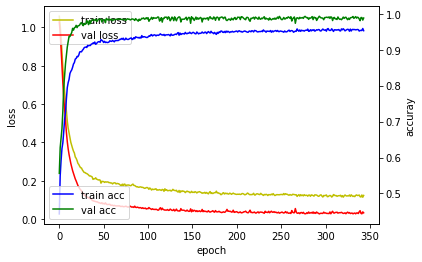

In [12]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [5]:
#모델 save
model.save("dnn_BMI.h5")

In [6]:
#load and evaluate the saved model
from numpy import loadtxt
from tensorflow.python.keras.models import load_model

#load model
loaded_model = load_model("dnn_BMI.h5")
loaded_model.summary()

score = loaded_model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1

test_loss:  0.03501950857192278
test_acc:  0.9874


In [7]:
#X_test의 예측 클래스 확인하기
print("input값")
print(X_test)

print()

print("예측 확률")
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob)

print()

print("예측 class")
y_pred = model.predict_classes(X_test)
print(y_pred)

input값
[[0.55  0.69 ]
 [0.36  0.76 ]
 [0.72  0.915]
 ...
 [0.37  0.965]
 [0.51  0.975]
 [0.67  0.815]]

예측 확률
[[1.4188095e-14 6.2040351e-03 9.9379599e-01]
 [9.9952602e-01 4.7400070e-04 0.0000000e+00]
 [6.9017015e-06 9.9999309e-01 1.1782918e-10]
 ...
 [1.0000000e+00 3.6146247e-12 0.0000000e+00]
 [9.9999988e-01 1.7751368e-07 0.0000000e+00]
 [7.5916662e-10 8.1117457e-01 1.8882541e-01]]

예측 class
[2 0 1 ... 0 0 1]


In [8]:
# 한 값을 예측할때, 괄호를 이중으로쳐준다 ---> X_test[[1]]

print(X_test[[1]])
print(X_test[1])

y_pred = model.predict_classes(X_test[[1]])
print(y_pred)

[[0.36 0.76]]
[0.36 0.76]
[0]


In [14]:
#임의의 값을 에측

X_new = [175, 75]
X_new[0]/=200
X_new[1]/=100

y_pred = model.predict_classes(np.array([X_new,]))
y_pred_prob = model.predict_proba(np.array([X_new,]))
print(y_pred, y_pred_prob)

[2] [[8.0450728e-26 7.7645655e-04 9.9922359e-01]]


In [15]:
#각종 임의의 값 예측

def predict_bmi(X_new):
    y_pred = model.predict_classes(np.array([X_new,]))
    y_pred_prob = model.predict_proba(np.array([X_new,]))
    print(y_pred, y_pred_prob)
    
X_mean = [X_train[:,0].mean(), X_train[:,1].mean()] #normal (1)
X_min = [X_train[:,0].min(), X_train[:,1].min()] #normal (1)
X_max = [X_train[:,0].max(), X_train[:,1].max()] #normal (1)
X_min_max = [X_train[:,0].min(), X_train[:,1].max()]  #thin (0)
X_max_min = [X_train[:,0].max(), X_train[:,1].min()]  #fat (2)

print("새로운값 input값")
print("X_mean : ", X_mean)
print("X_min : ", X_min)
print("X_max : ", X_max)
print("X_min_max : ", X_min_max)
print("X_max_min : ", X_max_min)

print()

print("새로운값 class와 class별 확률")
predict_bmi(X_mean)
predict_bmi(X_min)
predict_bmi(X_max)
predict_bmi(X_min_max)
predict_bmi(X_max_min)

새로운값 input값
X_mean :  [0.5757626666666668, 0.7999703333333333]
X_min :  [0.35, 0.6]
X_max :  [0.8, 1.0]
X_min_max :  [0.35, 1.0]
X_max_min :  [0.8, 0.6]

새로운값 class와 class별 확률
[1] [[3.8079686e-06 9.9999607e-01 7.9409624e-08]]
[1] [[1.1460465e-07 9.7708637e-01 2.2913536e-02]]
[1] [[2.0395566e-04 9.9979609e-01 2.9800614e-15]]
[0] [[1.0000000e+00 2.4018112e-14 0.0000000e+00]]
[2] [[5.2715604e-31 2.9737613e-04 9.9970263e-01]]
